<a href="https://colab.research.google.com/github/s2hee/2022_Summer_intern/blob/main/Assignment1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Load

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"se2heee","key":"50bb79e8f964d24bad4b83fb36d31f97"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d swaroopkml/cifar10-pngs-in-folders

 91% 128M/140M [00:02<00:00, 75.5MB/s]
100% 140M/140M [00:02<00:00, 62.9MB/s]


In [ ]:
!ls

cifar10-pngs-in-folders.zip  kaggle.json  sample_data


In [ ]:
!unzip /content/cifar10-pngs-in-folders.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cifar10/cifar10/train/truck/0001.png  
  inflating: cifar10/cifar10/train/truck/0002.png  
  inflating: cifar10/cifar10/train/truck/0003.png  
  inflating: cifar10/cifar10/train/truck/0004.png  
  inflating: cifar10/cifar10/train/truck/0005.png  
  inflating: cifar10/cifar10/train/truck/0006.png  
  inflating: cifar10/cifar10/train/truck/0007.png  
  inflating: cifar10/cifar10/train/truck/0008.png  
  inflating: cifar10/cifar10/train/truck/0009.png  
  inflating: cifar10/cifar10/train/truck/0010.png  
  inflating: cifar10/cifar10/train/truck/0011.png  
  inflating: cifar10/cifar10/train/truck/0012.png  
  inflating: cifar10/cifar10/train/truck/0013.png  
  inflating: cifar10/cifar10/train/truck/0014.png  
  inflating: cifar10/cifar10/train/truck/0015.png  
  inflating: cifar10/cifar10/train/truck/0016.png  
  inflating: cifar10/cifar10/train/truck/0017.png  
  inflating: cifar10/cifar10/train/truck/0018.png  
  inflating: cifar10/cifar10

# 1. Simple Model


*  batch size = 64
*  optimizer = Adam
*  epochs = 20
*  stride, padding = 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable

In [ ]:
data_dir = '/content/cifar10/cifar10'

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())
test_data = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
batch_size = 64

In [ ]:
train_dl = DataLoader(dataset, batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size*2)

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

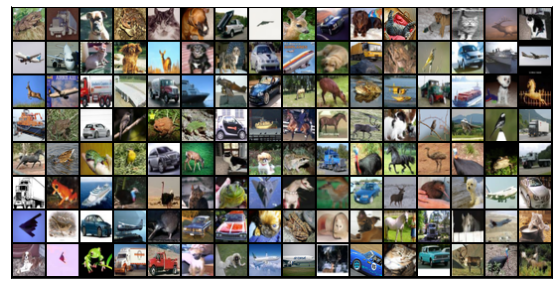

In [ ]:
show_batch(train_dl)

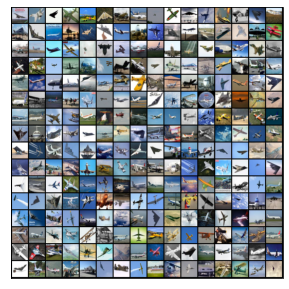

In [ ]:
show_batch(test_dl)

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        
        # Input shape: (64, 3, 32, 32)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)    # Shape: (64, 32, 32, 32)     
        self.relu1 = nn.ReLU()                                               # Shape: (64, 32, 32, 32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)   # Shape: (64, 64, 32, 32)
        self.relu2 = nn.ReLU()                                               # Shape: (64, 64, 32, 32)
        self.pool1 = nn.MaxPool2d(kernel_size=2)                             # Shape: (64, 64, 16, 16)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)    # Shape: (64, 128, 16, 16)     
        self.relu3 = nn.ReLU()                                                 # Shape: (64, 128, 16, 16)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)   # Shape: (64, 128, 16, 16)
        self.relu4 = nn.ReLU()                                                 # Shape: (64, 128, 16, 16)
        self.pool2 = nn.MaxPool2d(kernel_size=2)                               # Shape: (64, 128, 8, 8)
        
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)   # Shape: (64, 256, 8, 8)     
        self.relu5 = nn.ReLU()                                                 # Shape: (64, 256, 8, 8)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)   # Shape: (64, 256, 8, 8)
        self.relu6 = nn.ReLU()                                                 # Shape: (64, 256, 8, 8)
        self.pool3 = nn.MaxPool2d(kernel_size=2)                               # Shape: (64, 256, 4, 4)
        
        self.fc = nn.Linear(in_features=256*4*4, out_features=num_classes)    # Fully Connected Layer
        
        
    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output) 
        output = self.conv2(output)  
        output = self.relu2(output)
        output = self.pool1(output)
        output = self.conv3(output)
        output = self.relu3(output) 
        output = self.conv4(output)  
        output = self.relu4(output)
        output = self.pool2(output)
        output = self.conv5(output)
        output = self.relu5(output) 
        output = self.conv6(output)  
        output = self.relu6(output)
        output = self.pool3(output)     
       
        output = output.view(-1, 256*4*4)    # Reshape the output
        output = self.fc(output)
        
        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
model = Net(num_classes=10).to(device)

In [ ]:
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu6): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=4096, out_features=10, bias=True)
)


In [ ]:
optimizer = Adam(model.parameters(), lr=0.0001)
loss_function = nn.CrossEntropyLoss()

In [ ]:
epochs = 20

In [ ]:
# Training

best_acc = 0.0

for epoch in range(epochs):
    # Training
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    # For each batch in train_dl
    for i,(images, labels) in enumerate(train_dl):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        
        optimizer.zero_grad()    # Making the gradients 0 at the start of a new batch
        
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()     # Backpropagation
        optimizer.step()    # Update the weight and bias
        
        train_loss += loss.cpu().data*images.size(0)    # loss.cpu().data = loss
        _, prediction = torch.max(outputs.data, 1)
        
        train_accuracy += int(torch.sum(prediction==labels.data))
        
    train_loss = train_loss/len(dataset)
    train_accuracy = train_accuracy/len(dataset)
    
    # Evaluation on Validation data
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    # For each batch in test_dl
    for i,(images, labels) in enumerate(test_dl):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        
        outputs = model(images)
        loss = loss_function(outputs, labels)
        
        test_loss += loss.cpu().data*images.size(0)    # loss.cpu().data = loss
        _, prediction = torch.max(outputs.data, 1)
        
        test_accuracy += int(torch.sum(prediction==labels.data))
        
    test_loss = test_loss/len(test_data)
    test_accuracy = test_accuracy/len(test_data)
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Loss: '+str(test_loss)+' Test Accuracy: '+str(test_accuracy))

Epoch: 0 Train Loss: tensor(1.8786) Train Accuracy: 0.31126 Test Loss: tensor(1.5765) Test Accuracy: 0.4265
Epoch: 1 Train Loss: tensor(1.4953) Train Accuracy: 0.45996 Test Loss: tensor(1.3988) Test Accuracy: 0.4917
Epoch: 2 Train Loss: tensor(1.3545) Train Accuracy: 0.51522 Test Loss: tensor(1.2913) Test Accuracy: 0.5328
Epoch: 3 Train Loss: tensor(1.2630) Train Accuracy: 0.55296 Test Loss: tensor(1.2658) Test Accuracy: 0.5511
Epoch: 4 Train Loss: tensor(1.1830) Train Accuracy: 0.5837 Test Loss: tensor(1.1751) Test Accuracy: 0.5871
Epoch: 5 Train Loss: tensor(1.1118) Train Accuracy: 0.61046 Test Loss: tensor(1.1467) Test Accuracy: 0.5982
Epoch: 6 Train Loss: tensor(1.0570) Train Accuracy: 0.62986 Test Loss: tensor(1.0706) Test Accuracy: 0.6192
Epoch: 7 Train Loss: tensor(0.9978) Train Accuracy: 0.6511 Test Loss: tensor(1.0202) Test Accuracy: 0.6389
Epoch: 8 Train Loss: tensor(0.9470) Train Accuracy: 0.67182 Test Loss: tensor(0.9832) Test Accuracy: 0.6548
Epoch: 9 Train Loss: tensor(0.

# 2. CNN model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print(device)

cuda


In [ ]:
epochs = 40
batch_size = 64

In [ ]:
train_loader = DataLoader(dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size*2)

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        
        # Input shape: (64, 3, 32, 32)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)    # Shape: (64, 32, 32, 32)                              
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)   # Shape: (64, 64, 32, 32)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303216
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.303925
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.303147
Train Epoch: 1 [38400/50000 (77%)]	Loss: 2.296272
[1] Test Loss: 2.2128, Accuracy: 14.92%
Train Epoch: 2 [0/50000 (0%)]	Loss: 2.179806
Train Epoch: 2 [12800/50000 (26%)]	Loss: 2.061431
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.969737
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.898653
[2] Test Loss: 2.0058, Accuracy: 28.93%
Train Epoch: 3 [0/50000 (0%)]	Loss: 2.061527
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.782357
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.739923
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.638161
[3] Test Loss: 1.6259, Accuracy: 41.01%
Train Epoch: 4 [0/50000 (0%)]	Loss: 1.639097
Train Epoch: 4 [12800/50000 (26%)]	Loss: 1.782425
Train Epoch: 4 [25600/50000 (51%)]	Loss: 1.431931
Train Epoch: 4 [38400/50000 (77%)]	Loss: 1.566378
[4] Test Loss: 1.4989, Accuracy: 47.02%
Train Epoch: 5 [0/50000 (0%)]	Loss: 1.349508
Train Epoch: 5 